# 1. Importación de librerías

In [22]:
#Librerías a utilizar

import pandas as pd
pd.set_option("display.max_columns", 50)

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import pickle

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.base import clone

#2. Importación del Dataset

In [23]:
# Descargar la data
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00603/in-vehicle-coupon-recommendation.csv
#!ls -l
#dataset = pd.read_csv('/content/in-vehicle-coupon-recommendation.csv')
dataset = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00603/in-vehicle-coupon-recommendation.csv')

#3. Revisión del Dataset

In [44]:
#Visualizar la cabecera
dataset.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


In [53]:
#Visualizar datos generales
print("**************************************************")
print("Dimensiones")
print("**************************************************")
print(dataset.shape)
print("\n")
print("**************************************************")
print("Detalle de Columnas")
print("**************************************************")
print(dataset.info())
print("\n")
print("**************************************************")
print("Detalle del target")
print("**************************************************")
print(dataset.Y.value_counts())
print(dataset.Y.value_counts()/len(dataset))

**************************************************
Dimensiones
**************************************************
(12684, 26)


**************************************************
Detalle de Columnas
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null

In [50]:
#Visualizar posibles deficiencias del dataset
print("**************************************************")
print("Detalle de Nulos")
print("**************************************************")
print(dataset.isnull().sum())
print("\n")
print("**************************************************")
print("Detalle de posibles campos índice")
print("**************************************************")
print(dataset.nunique())

**************************************************
Detalle de Nulos
**************************************************
destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


**************************************************
Detalle de posibles campos índice
*

In [54]:
#Análisis de nulos
nulos = dataset.isna().sum()/len(dataset)*100
nulos[nulos>0].sort_values(ascending = False)

car                     99.148534
CoffeeHouse              1.710817
Restaurant20To50         1.490066
CarryAway                1.190476
RestaurantLessThan20     1.024913
Bar                      0.843582
dtype: float64

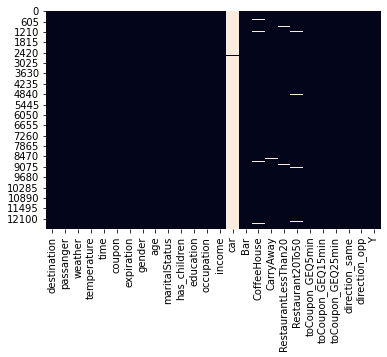

In [55]:
sns.heatmap(dataset.isnull(),cbar=False)

#4. Depuración del Dataset